# Project 1: Comprehensive Customer Churn Prediction

## Project Overview

In this project activity, you will dive into analyzing customer data from a business to predict churn risk comprehensively. You will not only apply traditional supervised learning algorithms such as decision trees and random forests but also explore logistic regression, support vector machines (SVMs), and k-nearest neighbors (KNN) to identify key churn factors. This expanded scope will enhance your understanding of different model assumptions, strengths, and weaknesses, enabling you to build a robust model to target potential churners effectively.

In this project, you will:
- **Evaluate** different supervised learning algorithms to understand their suitability for churn prediction.
- **Implement** data preprocessing techniques tailored to the requirements of each algorithm.
- **Optimize** model parameters to improve prediction accuracy.
- **Interpret** the model outcomes to extract actionable insights for retention campaigns.

**Estimated Completion Time**

12 to 14 hours


### Project Information
    Python Version: 3.10.13
    Python Packages: Outlined in pip_requirements.txt
    Dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv (Provided)
    File Authors: Tim Tieng, Scott Mayer

### Import Packages

In [1]:
# Import Packages: 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms, Modeling and preprocessing packages
import feature_engine
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn import preprocessing

# Deep Learning
import keras

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

---
---

## Task 1: Initial Data Exploration

**Objective:** Load the dataset and perform an initial examination to understand its structure and identify any immediate cleaning needs.

**Activities:**

1. Load the dataset using pandas and display the first few rows to get an initial understanding of the data.
2. Examine the dataset's shape to understand the scale of the data we're dealing with.
3. Check the data types of each column to identify which are categorical and which are numerical.
4. Identify any missing values in the dataset.
5. Generate summary statistics for numerical columns to identify any immediate anomalies or outliers.


**Estimated Completion Time:** 60 minutes

**Hints:**

* Use `pd.read_csv()` to load the dataset. Remember to `import pandas as pd`.
* Use `.head()`, `.info()`, `.dtypes`, `.isnull().mean()`, and .`describe()` methods to explore the dataset.

### Task 1.1: Load the Dataset

In [2]:
# Obtain - Read in the data, convert to PD Dataframe, and perform initial inspection of the dataset
churn_file = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df = pd.DataFrame(churn_file)

### Task 1.2: Examine the Dataset:

In [3]:
print(churn_df.shape)

(7043, 21)


#### Observations
1. Rows/Observations: 7043 
2. Attributes/Columns: 21
3. Datatypes Present: int64(2x), float64(1x), string objects(18x)
4. Memory Usage - 7.8 MB (Small)

### Task 1.3: Check Datatypes

In [4]:
# Initial inspect - Provde information on Attribute Names, Non-Null Count, Data Types, Memory Usage
churn_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Task 1.4: Check for Missing Values

#### Observations 
TotalCharges has some values with whitespace strings. These need replaced with 0s. We will also change the SeniorCitizen Column to a string because although it contains 0s and 1s, it is a categorical column. Lastly, we are changing TotalCharges to a numerical column because it contains numerical data. 

In [5]:
# Check for null Values - percentage per column
churn_df.isna().mean().sort_values(ascending= False)
# No null values 

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

In [6]:
churn_df.TotalCharges = churn_df['TotalCharges'].replace(' ', 0)
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('str')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])
churn_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Task 1.5: Generate Summary Statistics

In [7]:
# Intial Inspection of data using head()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Desriptive Statistics -Numerical Attributes
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [9]:
# Descriptive Statistics - Categorical Values included
churn_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


#### Data Observerations
1. Gender Distribution - Dataset has 7043 total observations with only two unique values (Male, Female). Right now there are 3555 Male values Which suggest the data is relatively balanced. 
2. Senior Citizen Attribute (Prior to DT casting) - The mean value is .162 which can be translated as 16.2 of the userbase is classified as a senior citizen. Additional definition of what describes a Senior Citizen mayh be needed for future analysis (what age classifies senior citizen cut off?)
3. Tenure - Mean value is about 32.4% with a min value of 0 months and max months membership of 72 months. STD is 24.6 which can be viewed as a wide variance in the quartiles.
4. XService Attributes - This showcases that this one company has multiple offerings  that can appeal to different customer bases. From a business perspective, we may need to study customer propensity to include one service based on the services the customer currently pays for. This can increase market capture for the business writ-large. (Bundling services to a subscription)
5. InternetService - Fiber Optic is the most frequent value in this column representing that almost half of the customer base pays for fiber optic services. This could be a business opportunity to focus on members with lower levels of internet service to upgrade potentially reducing the likliness of leaving our service for a competitor.
5. Churn - Top value is "no" with a frequency count of 5174/7043. This attribute should be used in future analysis

---
---

## Task 2: Exploratory Data Analysis (EDA)

**Objective:** Use statistical analysis and visualization techniques to uncover insights and identify patterns related to custom	er churn.

**Activities:**

1. **Visualize distribution of numerical features** to identify any skewed data or outliers.
2. **Analyze churn rate by categorical features** to uncover any patterns that may indicate a higher likelihood of churn.
3. **Examine relationships between features** using correlation matrices and scatter plots for numerical features, and stacked bar charts for categorical features against churn.
4. **Use box plots to identify outliers** in numerical data and understand distributions across churned and retained customers.
5. **Create a pair plot** to visualize the pairwise relationships and distributions of numerical features segmented by churn.


**Estimated Completion Time:** 90 minutes


**Hints:**

* Use `sns.histplot()` for distributions, `sns.countplot()` for categorical data analysis, `sns.heatmap()` for correlation matrices, `sns.boxplot()` for outliers, and `sns.pairplot()` for pairwise relationships.
* Remember to import necessary libraries like `seaborn as sns` and `matplotlib.pyplot as plt`.


### Task 2.1 Visualize distribution of numerical features
Created a function to visualize numerical features. 


In [10]:
def visualize_numerical_histograms(df):
    """
    Purpose - A function that takes in a dataframe and returns histograms on the dataframe's numerical values. 
              This helps with Exploratory Data Analysis (EDA).
    Parameters - Pandas Dataframe
    Returns - Nothing
    Prints - Histograms to highlight distributions
    """
    # Create numerical only dataframe based on datatypes in the info() output
    numerical_only_df = churn_df.select_dtypes(include=['float64', 'int64'])

    # Iterate
    for column in numerical_only_df.columns:
        # format the visualization
        plt.figure(figsize=(10,6))
        sns.histplot(data=numerical_only_df, x=column, kde=True, bins= 20)
        plt.title(f"Distribution of {column} Column of Churn Dataset")
        plt.xlabel = column
        plt.ylabel = 'Frequency'
        plt.show()


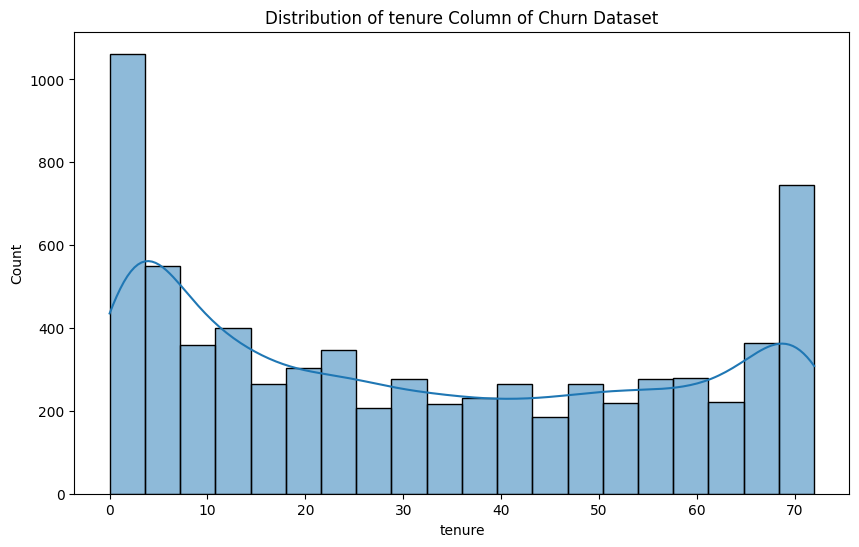

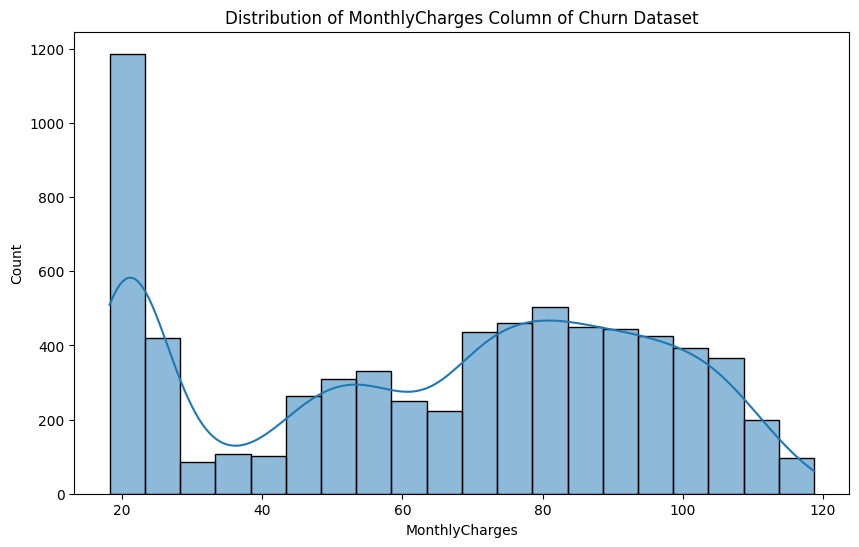

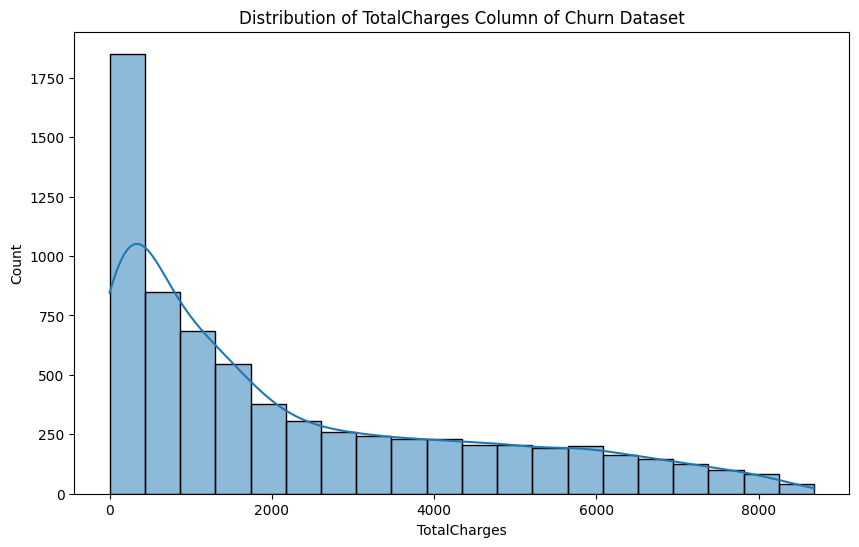

In [11]:
# Test and Verifify
visualize_numerical_histograms(churn_df)

#### Visual Observations
1. **Tenure Distribution**: There are two distinct peaks for this attribute, alluding to that the current customer base are either new OR customers that churn quickly. The center dip in the graph may allude to the typical range where churn is likely to happen
2. **MonthlyCharges Distribution**: Visually, there is a right skew to this column. There also seems to be a lot of customers who are only paying for $20 for services. This may highlight that these customers are only paying for a single service (internet, phone, etc). From a business/market capture perspective, we can view this as potential customer base to target with the goal of motivating them to add more services to their subscription. The right end of the graph may represent customers who pay for premium-like services or combines multiple service offerings to their subscription. 
3. **TotalCharges Distributio**n**: This attribute has a long trailing tail towards the right of the graph. Additionally, there are alot of customers with a low "TotalCharges" value. This is aligned with teh MonthlyCharges column and may be attributed to the customer base only paying for 1 service. 

**Business Significance**: The three graphs shows information abou the current customer base. It seems as though there are two "populations" in the customer base: Customers who are new, and customers who pay for multiple services. Based on the dip in the MonthlyCharges Distribution, this could be viewed as our customberbase we should focus on.

#### Statistical Observations: Anderson Tests for Skewness

In [12]:
def anderson_skewness_test(df):
  """
  Purpose - Conducts anderson skewness test on numerical columns to determine if column is normally distrubuted
  Parameters - Pandas Dataframe
  Returns - Nothing
  Prints - column name, anderson value, whether or not column is normal 
  """
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  for col in df.select_dtypes(include='number'):
    a = anderson(df[col], dist='norm')
    print(col + "\t", end="")
    if len(col) < 8:
      print("\t", end="")
    print(f'{a.statistic:.2f}', end="\t")
    if a.statistic < a.critical_values[0]:
      print("Normal")
    else:
      print("Not Normal")
  return 

anderson_skewness_test(churn_df)

tenure		203.24	Not Normal
MonthlyCharges	170.56	Not Normal
TotalCharges	346.64	Not Normal


Observations: 
- None of our numerical columns are normal at the 15% significance level based on having anderson values above the critical value at the 15% threshold. 

### Task 2.2 Analyze Churn by Categorical Features

In [13]:
def analyze_churn_categorical_features(df):
  """
  Purpose - To identify distribution of categories in categorical features
  Parameters - Pandas Dataframe
  Returns - Nothing
  Prints - Boxplots for the provided pandas Dataframe that can be used for Exploratory Data Analysis (EDA)
  """
  categorical_cols = []
  numerical_cols = []
  for c in df.columns:
    if df[c].map(type).eq(str).any() or df[c].map(type).eq(str).any():
      categorical_cols.append(c)
    else:
      numerical_cols.append(c)

  for col in categorical_cols:
    count = df[col].nunique() 
    print(f"{col}", end="")
    if len(col) < 8:
      print("\t", end="")
    if len(col) < 16:
      print("\t", end="")
    print(f" Num Categories: {count}")
    for cat in df[col].unique():
      if col == "customerID":
        continue
      count_cat = df[col].value_counts()[cat]  
      print(f"\t{cat}: {count_cat}, {count_cat/df.shape[0]*100:.2f}%")
    print()
    
  data_numeric = df[numerical_cols]
  data_categorical = pd.DataFrame(df[categorical_cols])
    
  data_joined = pd.concat([data_numeric, data_categorical], axis=1)
    
  data_joined.describe(include='all')
  data_joined.head()
  return


In [14]:
analyze_churn_categorical_features(churn_df)

customerID	 Num Categories: 7043

gender		 Num Categories: 2
	Female: 3488, 49.52%
	Male: 3555, 50.48%

SeniorCitizen	 Num Categories: 2
	0: 5901, 83.79%
	1: 1142, 16.21%

Partner		 Num Categories: 2
	Yes: 3402, 48.30%
	No: 3641, 51.70%

Dependents	 Num Categories: 2
	No: 4933, 70.04%
	Yes: 2110, 29.96%

PhoneService	 Num Categories: 2
	No: 682, 9.68%
	Yes: 6361, 90.32%

MultipleLines	 Num Categories: 3
	No phone service: 682, 9.68%
	No: 3390, 48.13%
	Yes: 2971, 42.18%

InternetService	 Num Categories: 3
	DSL: 2421, 34.37%
	Fiber optic: 3096, 43.96%
	No: 1526, 21.67%

OnlineSecurity	 Num Categories: 3
	No: 3498, 49.67%
	Yes: 2019, 28.67%
	No internet service: 1526, 21.67%

OnlineBackup	 Num Categories: 3
	Yes: 2429, 34.49%
	No: 3088, 43.84%
	No internet service: 1526, 21.67%

DeviceProtection Num Categories: 3
	No: 3095, 43.94%
	Yes: 2422, 34.39%
	No internet service: 1526, 21.67%

TechSupport	 Num Categories: 3
	No: 3473, 49.31%
	Yes: 2044, 29.02%
	No internet service: 1526, 21.67%

S

#### Observations 
- **Encoding Techniques**: Based on the distributions, it is likely a LabelEncoder is the best way to encode the various categorial columns in the dataset. 

In [15]:
# Correlation matrix and heatmap visualization
correlation_matrix = churn_df.corr(numeric_only=True)
correlation_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


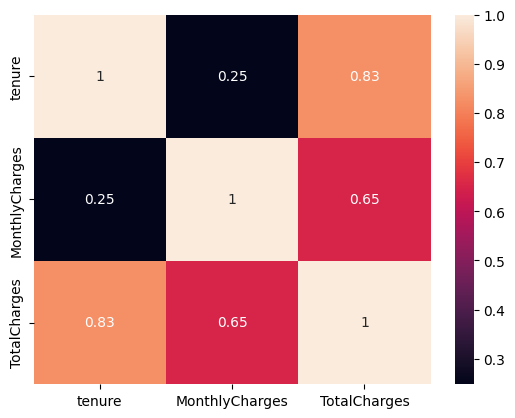

In [16]:
# Heatmap visualization of the correlation matrix 
# Purpose of visualizing Correlation Matrix - To see the relationships more apparently 
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Task 2.3: Examine Relationships in Data

#### Correlation Matrix and Heatmap Observations:
1. There are positive relationships amongst the 3 numerical attributes.
2. **SeniorCitizen vs Tenure (Prior to Casting)e** = The value is so close to 0 that it alludes to there is no relationship at all between these two attributes 
3. Tenure vs Monthly Charges - There is a slightly positive relationship between these two attributes. This suggests that as tenure increases, monthyl charges also increase slightly since they are positively correlated, although weak. This is an interesting anamoly as businesses tend to "reward" long-term customers or value their business throughout the years. This could be the business' approach to handle inflation.

In [17]:
def chi_squared_test(df, target):
    """
    Purpose - to assist in EDA on categorical data. This function performs a Chi-squared test on all all categorical 
            attributes in a df against the target variable.
    Target Variable - 'Churn'
    Parameters- pandas dataframe with numerical and categorical data
    Return - Nothing
    Prints - The Chi-squared statistic and p-value for each pair of categorical columns.
    """
    # Select Object dt based off the output from info()
    categorical_cols = df.select_dtypes(include=['object']).columns
    significant_results = []

    # Check if 'Churn' Column is present. If not, prompt the user
    if target not in categorical_cols:
        print(f"The target variable {target} is not found. Please verify")
        return significant_results

    # Perform a Chi-squared test for each pair of categorical variables
    for col in categorical_cols:
        if col == target:
            continue
        # Create a contingency table
        contingency_table = pd.crosstab(df[col], df[target])

        # Perform the Chi-squared test - chi2 value, p value, degrees of freedom and expected frequencies if null hypothesis were true
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Save the result IF p value is less than or equal to 0.05 - Statistically significant
        if p <= 0.05:
            significant_results.append({
                'Column 1': col,
                'Chi-squared Statistic': chi2,
                'p-value': p
            })

            # Output the result
            print(f"Chi-squared test for {col} and {target}")
            print(f"Chi-squared Statistic: {round(chi2,2)}, p-value: {round(p,4)}\n")

    return 

In [18]:
# Test by calling the function
chi_squared_test(churn_df, 'Churn')

Chi-squared test for SeniorCitizen and Churn
Chi-squared Statistic: 159.43, p-value: 0.0

Chi-squared test for Partner and Churn
Chi-squared Statistic: 158.73, p-value: 0.0

Chi-squared test for Dependents and Churn
Chi-squared Statistic: 189.13, p-value: 0.0

Chi-squared test for MultipleLines and Churn
Chi-squared Statistic: 11.33, p-value: 0.0035

Chi-squared test for InternetService and Churn
Chi-squared Statistic: 732.31, p-value: 0.0

Chi-squared test for OnlineSecurity and Churn
Chi-squared Statistic: 850.0, p-value: 0.0

Chi-squared test for OnlineBackup and Churn
Chi-squared Statistic: 601.81, p-value: 0.0

Chi-squared test for DeviceProtection and Churn
Chi-squared Statistic: 558.42, p-value: 0.0

Chi-squared test for TechSupport and Churn
Chi-squared Statistic: 828.2, p-value: 0.0

Chi-squared test for StreamingTV and Churn
Chi-squared Statistic: 374.2, p-value: 0.0

Chi-squared test for StreamingMovies and Churn
Chi-squared Statistic: 375.66, p-value: 0.0

Chi-squared test 

#### Chi-Squared On Categorical Values Observations

- To identify the relationship between categorical values and our target variable of "Churn", we created a function to run the chi-squared test on our dataframe.
- Low p-values across the attributes, confirming strong rejection of the null hypothesis
- These attributes may have strong predicitve power in our future modeling

**Attributes with strong Association with 'Churn' (Chi Statistic values are 500 or greater)**
1.  InternetService
2.  OnlineSecurity
3.  OnlineBackup
4.  DeviceProtection
5.  TechSupport
6.  PaymentMethod
7.  Contract

In [19]:
# Cramers-V Test Function Version 2
def cramers_v(confusion_matrix):
    """
    Purpose: Calculates Cramer's V statistic for categorical variables.
    Parameters: 
        x = first categorical Value
        y = second categorical value
    Returns: Cramer's V value
    """
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Total observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [20]:
def calculate_cramers_v_for_attributes(df, attributes):
    """
    Purpose: To assess the relationship between each pair of categorical attributes.
    Parameters:
        df: pandas DataFrame containing the data.
        attributes: list of column names of potential categorical variables.
    Returns:
        A dictionary with key as attribute pairs and value as Cramer's V statistic.
    """
    cramers_v_results = {}
    for i, attr1 in enumerate(attributes):
        for attr2 in attributes[i+1:]:
            confusion_matrix = pd.crosstab(df[attr1], df[attr2])
            cramers_v_value = cramers_v(confusion_matrix)
            cramers_v_results[(attr1, attr2)] = cramers_v_value

    return cramers_v_results

In [21]:
potential_attributes = ['InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract' ]
cramers_v_results = calculate_cramers_v_for_attributes(churn_df, potential_attributes)
for pair, value in cramers_v_results.items():
    print(f"Cramer's V for {pair}: {value:.4f}")

Cramer's V for ('InternetService', 'OnlineSecurity'): 0.7244
Cramer's V for ('InternetService', 'OnlineBackup'): 0.7071
Cramer's V for ('InternetService', 'DeviceProtection'): 0.7070
Cramer's V for ('InternetService', 'TechSupport'): 0.7228
Cramer's V for ('InternetService', 'PaymentMethod'): 0.3125
Cramer's V for ('InternetService', 'Contract'): 0.2063
Cramer's V for ('OnlineSecurity', 'OnlineBackup'): 0.7183
Cramer's V for ('OnlineSecurity', 'DeviceProtection'): 0.7172
Cramer's V for ('OnlineSecurity', 'TechSupport'): 0.7330
Cramer's V for ('OnlineSecurity', 'PaymentMethod'): 0.3043
Cramer's V for ('OnlineSecurity', 'Contract'): 0.3009
Cramer's V for ('OnlineBackup', 'DeviceProtection'): 0.7190
Cramer's V for ('OnlineBackup', 'TechSupport'): 0.7197
Cramer's V for ('OnlineBackup', 'PaymentMethod'): 0.2818
Cramer's V for ('OnlineBackup', 'Contract'): 0.2581
Cramer's V for ('DeviceProtection', 'TechSupport'): 0.7264
Cramer's V for ('DeviceProtection', 'PaymentMethod'): 0.2863
Cramer's V

#### Cramer's V Observations
1. Peaks - there are two peaks in the tenure plot, confirming that there are two core customer bases within this customer.
2. Total Charges -Skewed to the right, highlighting that most customers have lower total charges. Confirms visualziations above
3 Churn vs No Churn - There seems to be a higher cluster of churned customers in lower ends of tenure and higher ends of monthly charges
4. Churn in Total Charges - The churned customers are located in the lower total charges region of the graph, highlighting that the churned customers are newer to the service

### Task 2.4: Use Boxplots to identify outliers in numerical data

In [22]:
# Visualize Box Plots
def create_boxplots(df):
    """
    Purpose - To create boxplots of a given dataframe
    Parameters - Pandas Dataframe
    Returns - Nothing
    Prints - Boxplots for the provided pandas Dataframe that can be used for Exploratory Data Analysis (EDA)
    """
    # Create numerical only dataframe
    numerical_only_df = churn_df.select_dtypes(include=['float64', 'int64'])
    # Base figure width that can be  scale based on the range of the data
    base_width = 5
    max_width = 15 # added to resolve ValueError: Image size of 217119x400 pixels is too large. It must be less than 2^16 in each direction.

    # Iterate over each column
    for column in numerical_only_df:
        # Calculate the range of the column data
        data_range = numerical_only_df[column].max() - numerical_only_df[column].min()
        
        # Scale the figure width, we use max to ensure a minimum width is maintained
        figure_width = min(max(base_width, base_width * (data_range / 20)), max_width)  # Updated as part of max_width 
        
        # Create a figure with the adjusted size
        plt.figure(figsize=(figure_width, 4))  # Height is kept constant
        plt.title(f'Boxplot for {column} Attribute')
        sns.boxplot(x=df[column], orient='h')
        
        plt.show() 

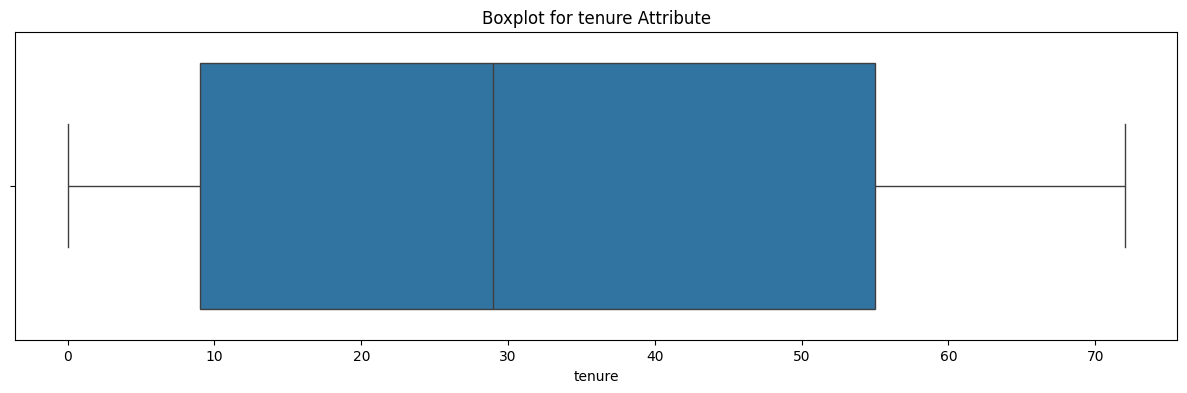

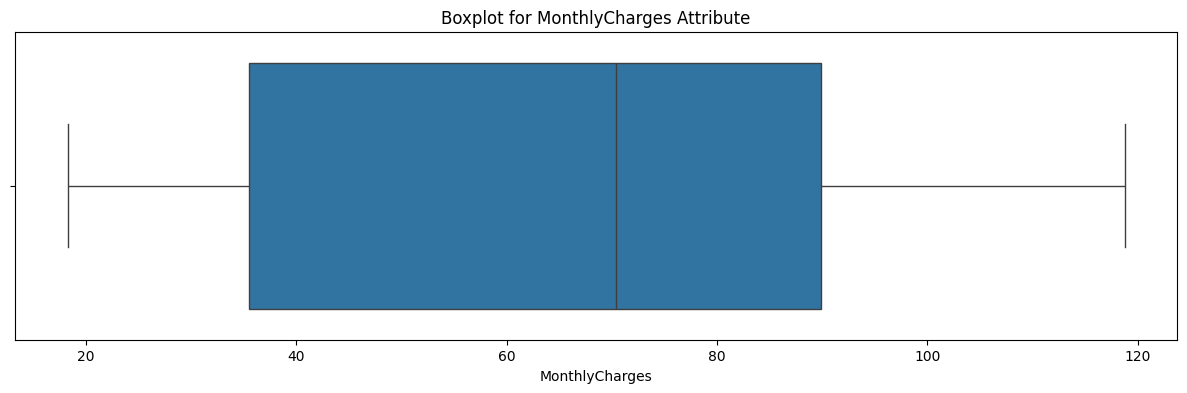

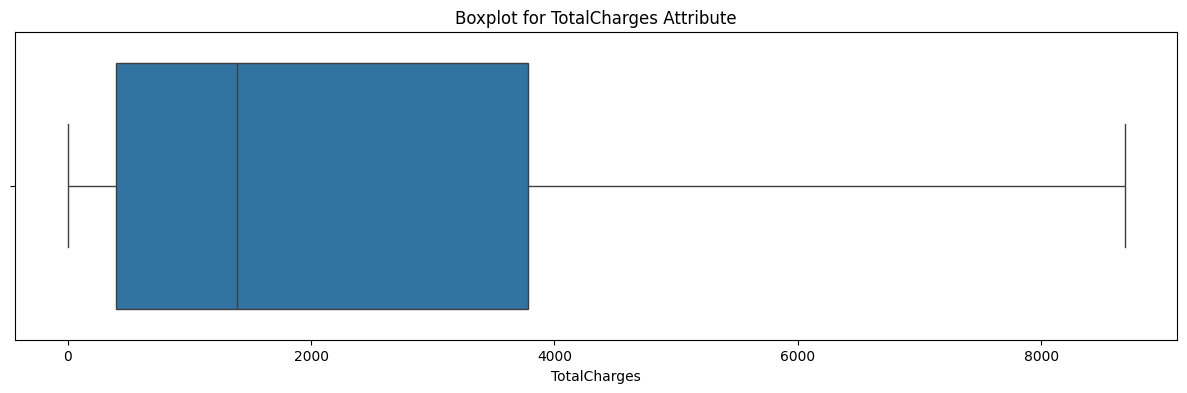

In [23]:
create_boxplots(churn_df)

#### Boxplot Observations
1. **SeniorCitizen (Prior to casting)** - There seems to be an outlier that returns an ineffective boxplot. I need to create a function that can handle outliers. I originally thought handling the figure width was needed to resolve the error. 
2. **Tenure Boxplot** : This attrribute looks relatively uniform. This graph visually describes the customers who been wiht the services for a long time
3. **MonthlyCharges Boxplot**: The median placement on the graph confirms the right skew nature from the histogram. This plot also confirms the observation that customers tend to have lower monthly charges or are paying for single services vs bundling services
4. **TotalCharges Boxplot**: The skewness of this attribute is more apparent in the boxplot. The median value represents that half of the customer base is clustered towards the lower end of charges. Potential outliers as indicated by the long tail on the right side of the plot

### Task 2.5: Create Pair Plot

In [24]:
def create_pairplot(df, target_variable, palette='viridis', diag_kind='kde'):
    """
    Purpose: Creates and displays a pair plot for the given DataFrame.
    Parameters:
        - df: pandas DataFrame to plot.
        - target_variable: the name of the column to use for coloring (hue) the data points.
        - palette: color palette to use for different hues.
        - diag_kind: kind of plot for the diagonal subplots.
    Returns: The Seaborn PairGrid object for further customization if required.
    """
    pairplot = sns.pairplot(df, hue=target_variable, palette=palette, diag_kind=diag_kind)
    plt.show()
    return pairplot

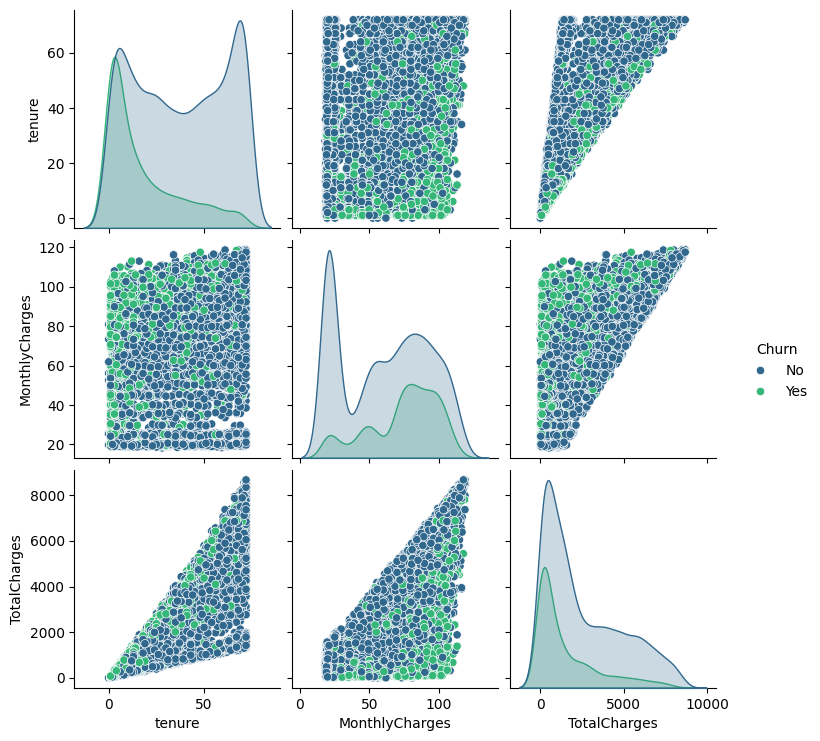

In [25]:
create_pairplot(churn_df, 'Churn')

#### Pairplot Observations
Observe that there is a greater number of churned customers (green dots) on the lower right corners of the MonthlyCharges plots. This likely indicates that there is a relationship between how large a customer's monthly charge is and whether or not they remain a customer. 

---
---

## Task 3: Data Preprocessing

**Objective:** Split the dataset into training and testing sets, then clean the training dataset by handling missing values, outliers, and duplicate entries using `feature_engine` to prepare for further analysis.

**Activities:**

1. **Split the dataset into training and testing** sets to ensure a fair evaluation of the model built on processed data.
2. **Handle missing values** in the training set using appropriate imputation techniques.
3. **Identify and treat outliers** in numerical features of the training set to minimize their impact.
4. **Check for and remove constant and duplicate entries** in the training set to maintain data integrity.
5. **Apply the same preprocessing steps** (imputation, outlier handling) to the test set using parameters derived from the training set to maintain consistency and prevent data leakage.

**Estimated Completion Time:** 90 minutes

***Note:*** *The splitting of the dataset into training and testing sets before preprocessing is a best practice in machine learning. This approach ensures that the model is evaluated on unseen data that has been processed in the same way as the training data, without using information from the test set during the training phase.*



**Hints:**

* Use `train_test_split` from `sklearn.model_selection` to split your data.
* Handle numerical missing values with pandas `.fillna()`, sklearn's `SimpleImputer` or feature-engine's `MeanMedianImputer`.
* Detect and handle outliers by calculating IQR or using feature_engine's Winsorizer.
* Remove duplicates using DataFrame's `.drop_duplicates()` method or feature-engine's `DropDuplicateFeatures()` class.

### Task 3.1: Split the Dataset

In [26]:
# Create a copy of the original data fram for break glass scenarios
churn_original = churn_df.copy()

# Drop Columns
X = churn_df.drop(columns=['customerID', 'Churn'], axis=1)

# Isolate target variable 
Y = churn_df['Churn']

# Normalize/Scale numerical columns
numerics = ['int64', 'float64']
categorical_cols = []
numerical_cols = []
for c in X.columns:
  if X[c].map(type).eq(str).any() or X[c].map(type).eq(str).any():
    categorical_cols.append(c)
  else:
    numerical_cols.append(c)

X_numeric = X[numerical_cols]
scaler = MinMaxScaler()
for col in X_numeric:
    X_numeric[col] = scaler.fit_transform(pd.DataFrame(X_numeric[col]))

X_categorical = pd.DataFrame(X[categorical_cols])
X = pd.concat([X_numeric, X_categorical], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=42)



### Task 3.2: Handle Missing Values

Missing data handled earlier. 

### Task 3.3: Identify and treat outliers

We identified that there are no outliers in our dataset. 

### Task 3.4: Check for and remove duplicate entries

We observed that here are no duplicate entries in our dataset. 

### Task 3.5: Apply same preprocessing steps to test set

Complete. 

## Task 4: Feature Selection and Engineering

**Objective:** Create new features that might improve model performance, transform applicable features, and select the most relevant features for modeling.

**Activities:**

  1. **Feature Creation:** Create a feature that captures the customer's total spend relative to their tenure. This could highlight customers who might be paying more over a shorter period, potentially indicating dissatisfaction..
  2. **Feature Transformation:**  Normalize skewed features such as MonthlyCharges and TotalCharges using a variance stabilizer to make their distribution more symmetric, which can help certain algorithms perform better.
  3. **Feature Selection:** Use mutual information or another model-based feature selection method to identify features that have the most significant relationship with the target variable, `Churn`.

**Estimated Completion Time:** 90 minutes

**Hints:**

* Create new features based on existing data that might indicate behavioral patterns.
* Use feature_engine's `YeoJohnsonTransformer` or manual transformations for skewed features.
* Select relevant features based on mutual information using `SelectKBest` from sklearn.

### Peform Ordinal Encoding on categorical columns

In [27]:
encoder = OrdinalEncoder(encoding_method='arbitrary')

try:
    encoder.fit(X_train)
    X_train = encoder.transform(X_train)
    X_test = encoder.transform(X_test)
except TypeError as e:
    print("X Data already encoded")

X_train_original = X_train
X_test_original = X_test

In [28]:
try:
    encoder.fit(pd.DataFrame(Y_train))
    Y_train = encoder.transform(pd.DataFrame(Y_train))
    Y_test = encoder.transform(pd.DataFrame(Y_test))
    Y_train = Y_train['Churn']
    Y_test = Y_test['Churn']
except TypeError as e:
    print("Y Data already encoded")

Y_train_original = Y_train
Y_test_original = Y_test

In [29]:
Y_train.head()

6607    0
2598    1
2345    1
4093    1
693     0
Name: Churn, dtype: int64

### Task 4.1: Feature Creation

In [30]:
# Create feature that captures customer's total spend relative to their tenure
X_train['feature_1'] = X_train['TotalCharges'] / (X_train['tenure'] + 1)
X_test['feature_1'] = X_test['TotalCharges'] / (X_test['tenure'] + 1) 
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,feature_1
6607,0.013889,0.070149,0.002913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002873
2598,0.097222,0.566169,0.060450,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0.055094
2345,0.055556,0.017910,0.009845,1,0,0,0,1,1,2,1,1,2,1,1,1,0,0,1,0.009327
4093,0.402778,0.574627,0.255072,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,2,0.181834
693,0.041667,0.565672,0.031169,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,2,0.029923


### Task 4.2: Feature Transformation

In [31]:
transformer = YeoJohnsonTransformer(variables=['MonthlyCharges', 'TotalCharges'])
transformer.fit(X_train) 
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,feature_1
6607,0.013889,0.071105,0.002898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002873
2598,0.097222,0.623325,0.054477,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0.055094
2345,0.055556,0.017973,0.009674,1,0,0,0,1,1,2,1,1,2,1,1,1,0,0,1,0.009327
4093,0.402778,0.633427,0.172043,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,2,0.181834
693,0.041667,0.622731,0.029513,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,2,0.029923


### Task 4.3: Feature Selection

In [32]:
# Identify 10 best features based on chi2 test
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_train, Y_train)
best_features = selector.get_feature_names_out()

# Drop columns that are not in the top 10
X_train = X_train[best_features]
X_test = X_test[best_features]

X_train.head()


,tenure,SeniorCitizen,Partner,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
6607,0.013889,0,0,0,0,0,0,0,0,0
2598,0.097222,0,0,0,0,1,0,0,0,0
2345,0.055556,0,0,1,1,2,1,0,0,1
4093,0.402778,0,0,0,0,0,0,0,0,2
693,0.041667,0,0,0,0,0,0,0,0,2


---
---

## Task 5: Logistic Regression and Assumptions Validation

**Objective:** Implement a logistic regression model and validate its assumptions, adjusting features as necessary.

**Activities:**

  1. **Fit a logistic regression model** using the selected features from Task 4 to predict customer churn.
  2. **Check for multicollinearity** among predictors.
  3. **Adjust Features** based on based on the findings from assumption validations. This may involve transforming variables, removing or adding features, or addressing outliers and multicollinearity.
  4. **Examine the coefficients** from the logistic regression model to determine feature importance.
  5. **Fit a new logistic regression model** and compare its results with the initial model

**Estimated Completion Time:** 90 minutes

**Hints:**

* Fit the logistic regression model using `LogisticRegression` from sklearn.
* Validate linearity using scatter plots or seaborn’s `lmplot`.
* Check multicollinearity with VIF from the statsmodels library.
* Assess model residuals with `residplot` from seaborn or manually plot residuals.

### Task 5.1: Fit a logistic regression model

In [33]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

score = logistic_regression.score(X_test, Y_test)
print(f"LogReg Score: {score * 100:.2f}")

LogReg Score: 79.44


### Task 5.2: Check for Multicolinearity

In [34]:
# Variance inflation factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

   VIF Factor          features
0    5.404651            tenure
1    1.191180     SeniorCitizen
2    2.201104           Partner
3    2.254250    OnlineSecurity
4    2.374395      OnlineBackup
5    2.540605  DeviceProtection
6    2.322058       TechSupport
7    3.751829          Contract
8    1.845371  PaperlessBilling
9    2.413899     PaymentMethod


#### Observations
Observe that PaperlessBilling and SeniorCitizen have the smallest VIF factor and therefor the smallest impact on our model. These two columns are good candidates to be removed from our model. 

### Task 5.3: Adjust Features Based on Findings

In [35]:
try:
    # Drop columns with low VIF
    X_train = X_train.drop(['SeniorCitizen', 'PaperlessBilling'], axis=1)
    X_test = X_test.drop(['SeniorCitizen', 'PaperlessBilling'], axis=1)
except KeyError as e:
    print("Columns already dropped")

#### Dropped Columns Justification
After discussion, we determined that majority of the VIF factors are clusters at 2.0, with tenure at 5.4. 
We see tenure's VIF value as an indicator of a strong predictor of our target variable 'Churn'.
We decided to drop the two lowest VIF factors as they may not be best predicitive attributes for 'Churn'

### Task 5.4: Examine Coeffiencients

In [36]:
nums = list(range(0, len(logistic_regression.coef_[0])))
cols = X_train.columns.tolist() 

for i, col in zip(nums, cols):
    print(f"{col}", end="\t")
    if len(col) < 8:
      print("\t", end="")
    if len(col) < 16:
      print("\t", end="")
        
    print(f"Coef: {logistic_regression.coef_[0][i]}")

tenure			Coef: 1.3898210403507014
Partner			Coef: -0.34234862296844315
OnlineSecurity		Coef: 0.028755133568388044
OnlineBackup		Coef: 0.3260282912313659
DeviceProtection	Coef: 0.08410388550268631
TechSupport		Coef: 0.2499462984758625
Contract		Coef: 0.1988676904714109
PaymentMethod		Coef: 0.818323574755259


### Task 5.5: Create a new model 

In [37]:
X_train_log_reg = X_train
X_test_log_reg = X_test
log_reg_improved = LogisticRegression()
log_reg_improved.fit(X_train, Y_train)

score = log_reg_improved.score(X_test, Y_test)
print(f"LogReg Score: {score * 100:.2f}")

LogReg Score: 78.25


#### Observations
By removing the two columns with the least impact on our model, our model's accuracy dropped from .79 to .78. This slight reduction in accuracy is justifiable due to the 20% decrease in model complexity. 

#### Compare Coeffiecients between models

In [38]:
nums = list(range(0, len(logistic_regression.coef_[0])))
cols = X_train.columns.tolist() 

for i, col in zip(nums, cols):
    print(f"{col}", end="\t")
    if len(col) < 8:
      print("\t", end="")
    if len(col) < 16:
      print("\t", end="")
        
    print(f"Coef: {logistic_regression.coef_[0][i]:0.4f}\t{log_reg_improved.coef_[0][i]:0.4f}")

tenure			Coef: 1.3898	1.1873
Partner			Coef: -0.3423	0.0138
OnlineSecurity		Coef: 0.0288	0.3630
OnlineBackup		Coef: 0.3260	0.0813
DeviceProtection	Coef: 0.0841	0.2937
TechSupport		Coef: 0.2499	0.2239
Contract		Coef: 0.1989	0.8973
PaymentMethod		Coef: 0.8183	0.2842


### Observations
Notes - The coefficients of logistic regression models represent the log odds of an outcome will occur given a change in the predictor variable, while holding other variables constant.

Coefficients in LM2 are higher compared to Logistic_regression (Model1). This highlights that **the probability of churn was distributed to other attributes after removing two columns** In other words, this makes it easier to see which values have strong influence on 'Churn'

1. **Partner** - Positive coefficients in both regression models, but is much smaller in LM2. This may suggest that having a partner or not has a weak influence over churn.
2. **OnlineSecurity** - Confirms there is a positive association with Churn, with a higher association value in LM2 (dropped columns)
3. **DeviceProtection** - The coefficient is larger in model 2 which states that log odds of churn higher in model 2. BLUF: LM2 has hints at a stronger association with Churn. In Businessterms, having an appealing device protection plan may influence customers to stay with their current service.
4. **Contract** - Similar to DeviceProtection, the effect of this attribute on churn is stronger in LM2. This states that the type of contract a customer has can strongly influence a customers decision to churn.

### Task 5.6: Validate linear relationship between LogisticRegression and log odds

tenure


Partner
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaymentMethod


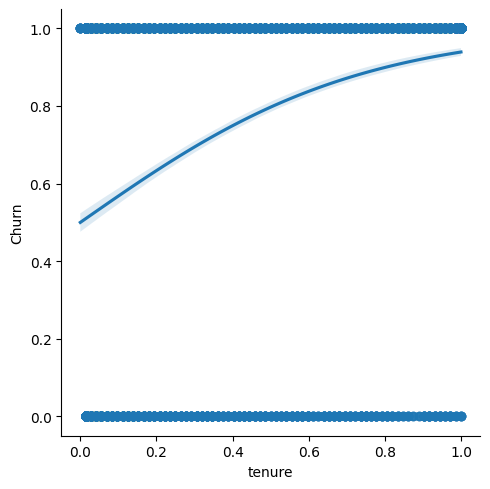

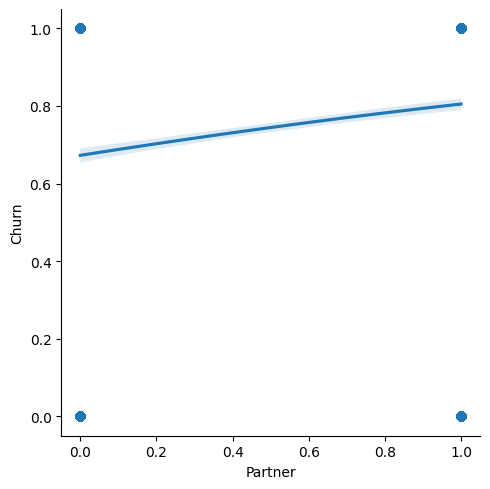

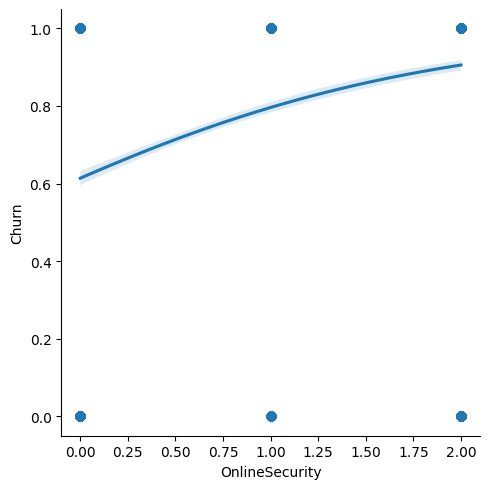

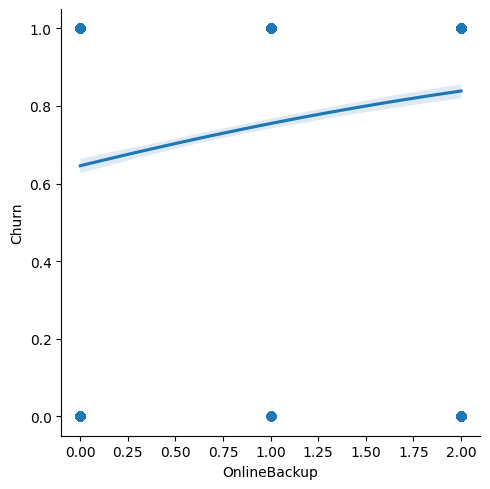

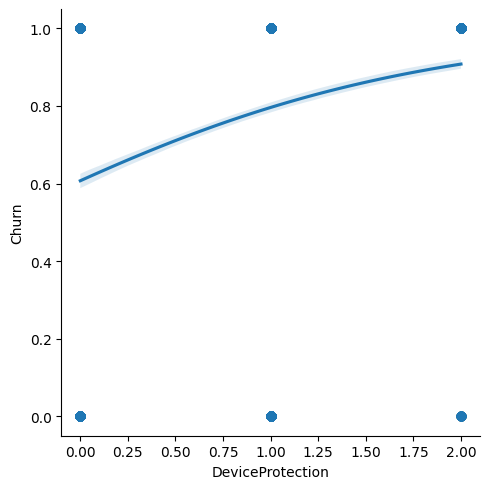

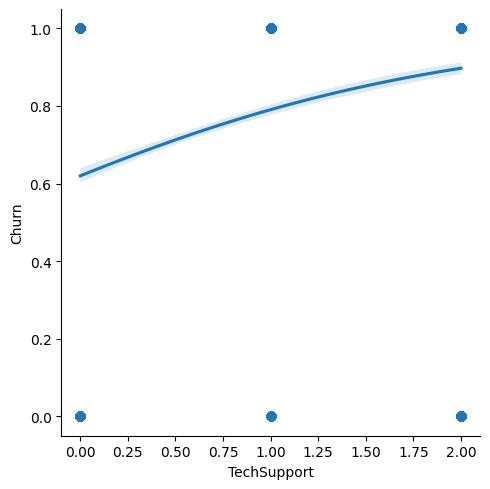

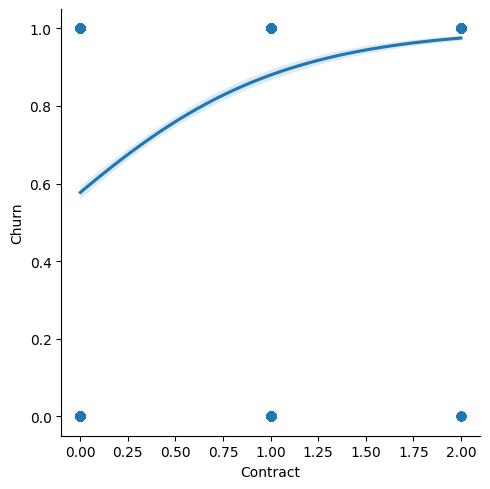

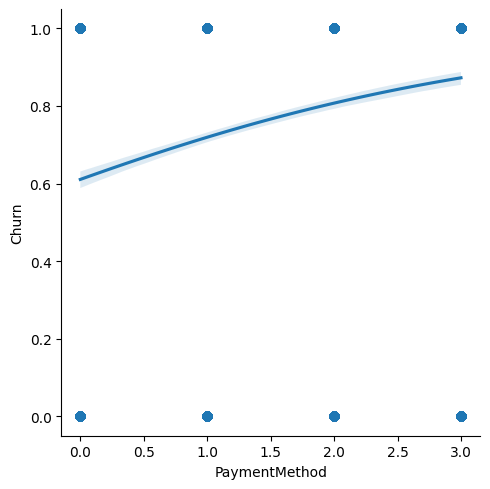

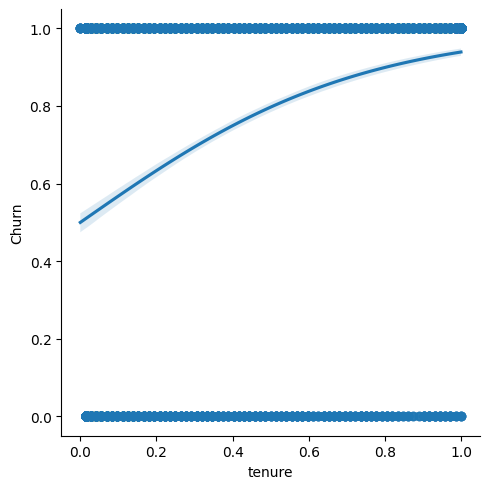

In [39]:
data_joined = pd.concat([X_train, Y_train], axis=1)

for col in data_joined.columns[:-1]:
    print(col)
    sns.lmplot(x=col, y='Churn', data=data_joined, logistic=True)

sns.lmplot(x='tenure', y='Churn', data=data_joined, logistic=True)


#### Observations on LMPlots

Notes - the direction and slope of the line tells us the behavior of between the attributes. The slope of the line shows the direction of behavior: (Similar to correlation matrices)
        - Downward Slope - as a feature increases, one is likely to decrease
        - Upward Slope - as a feature increases, the other increases as well 

1. **Tenure** - As tenure increases, churn tends to decrease/
2. **SeniorCitizen** - Senior Citizens are less likely to leave a service
3. **Partner** - Seems to have little influence in customer churn
4. **OnlineSecurity** Customers with this service are less likely to churn
5. **OnlineBackup** Similar behavior to OnlineSecurity
6. **DeviceProtection** - Similar to OnlineSecurity and OnlineBackup
7. **TechSupport** - Similar behavior to OnlineSecurity, OnlineBackup, and DeviceProtection
8. **Contract** - Customers with longer contracts are less likely to churn. This may signifiy that there are penalties inplace incentivizing a customer to stay within their contract terms.

**Significance** - Tenure, Contract, and the "premium features" seem to have significant influence over 'Churn'. Further analysis is required to confirm this prediction.

---
---

## Task 6: Decision Trees, Random Forests, and Model Complexity

**Objective:** Build decision tree and random forest models, focusing on understanding and tuning model complexity to avoid overfitting.

**Activities:**

  1. **Use the decision tree classifier** to create a model for predicting customer churn. Focus on understanding the default model complexity and its impact on performance.
  2. **Experiment with parameters** that control the complexity of the decision tree, such as max_depth, min_samples_split, and min_samples_leaf, to find a balance that reduces overfitting while maintaining good predictive performance.
  3. **Implement a random forest classifier** to improve prediction accuracy and robustness by aggregating multiple decision trees.
  4. **Adjust parameters** such as n_estimators, max_depth, and max_features to optimize the random forest model. Aim to enhance model accuracy without significant overfitting.
  5. **Use metrics** such as accuracy, precision, recall, F1 score, and the ROC-AUC score to evaluate and compare the decision tree and random forest models.
  6. **Investigate the features that are most influential** in predicting customer churn according to the random forest model.

**Estimated Completion Time:** 90 minutes


**Hints:**

* Train models using `DecisionTreeClassifier` and `RandomForestClassifier` from sklearn.
* Use `GridSearchCV` or `RandomSearchCV` for hyperparameter tuning.
* Evaluate model performance with `sklearn.metrics` and visualize feature importance.

##### Reload the original, cleaned data

In [40]:
X_train = X_train_original
X_test = X_test_original
Y_train = Y_train_original
Y_test = Y_test_original

### Task 6.1: DecisionTreeClassifier

In [41]:
# Instantiate decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
score = dtc.score(X_test, Y_test)
print(f"DecisionTreeModel Score: {score * 100:.2f}%")

DecisionTreeModel Score: 72.40%


### Task 6.2: Tune DecisionTreeClassifier Hyperparameters

In [42]:
# Loop over various parameter values and keep the best score 
max_score = 0 
for i in range(1, 20):
    for j in range(2, 20):
        for k in range(1, 20):
            dtc = DecisionTreeClassifier(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dtc.fit(X_train, Y_train)
            score = dtc.score(X_test, Y_test)
            if score > max_score:
                max_score = score
                print(f"{i}, {j}, {k} \t Score: {score * 100:.2f}%")


1, 2, 1 	 Score: 72.80%


2, 2, 1 	 Score: 73.94%
3, 2, 1 	 Score: 77.51%
4, 2, 1 	 Score: 78.48%
4, 2, 9 	 Score: 78.65%
5, 2, 1 	 Score: 79.16%
5, 2, 9 	 Score: 79.39%
7, 2, 17 	 Score: 79.56%


In [43]:
tdtc = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=19)
tdtc.fit(X_train, Y_train)
tscore = tdtc.score(X_test, Y_test)
print(f"Tuned DecisionTreeModel Score: {tscore * 100:.2f}%")

Tuned DecisionTreeModel Score: 78.99%


#### Observations
By experimenting with various max_depth, min_samples_split, and min_samples_leaf parameters, we found the best combination of max_depth=6, min_samples_split = 2, and min_samples_leaf=19 to have an accuracy of 77.97%, which is significantly better than the original DecisionTreeClassifier with default parameters.  

### Task 6.3: RandomForestClassifier

In [44]:
# RF Model updated n_estimators , max_depth, 
RFM2 = RandomForestClassifier(n_estimators=20, max_depth= 5, max_features= 15)
RFM2.fit(X_train, Y_train)
RFM2Score = RFM2.score(X_test, Y_test)
print(f"Random Forest Model Score: {RFM2Score * 100:.2f}%")

Random Forest Model Score: 79.56%


### Task 6.4: Tune RandomForestClassifier

In [45]:
# RF Model updated n_estimators , max_depth, 
RFM2 = RandomForestClassifier(n_estimators=10, max_depth= 5, max_features= 10, random_state=42)
RFM2.fit(X_train, Y_train)
RFM2Score = RFM2.score(X_test, Y_test)
print(f"Tuned Random Forest Model Score: {RFM2Score * 100:.2f}%")

Tuned Random Forest Model Score: 80.47%


In [46]:
# Programtically increase the features
max_score = 0 
for i in range(8, 20):
    for j in range(4, 20):
        for k in range(2, 20):
            rfm3 = RandomForestClassifier(n_estimators = i, max_depth=j, max_features=k)
            rfm3.fit(X_train, Y_train)
            score = rfm3.score(X_test, Y_test)
            if score > max_score:
                max_score = score
                print(f"{i}, {j}, {k} \t Score: {score * 100:.2f}%")

8, 4, 2 	 Score: 78.42%
8, 4, 3 	 Score: 78.53%
8, 4, 4 	 Score: 78.59%
8, 4, 6 	 Score: 78.82%
8, 4, 7 	 Score: 79.16%
8, 4, 8 	 Score: 79.33%
8, 4, 11 	 Score: 79.67%


8, 5, 5 	 Score: 80.41%
8, 6, 14 	 Score: 80.52%
8, 8, 16 	 Score: 80.75%
8, 10, 10 	 Score: 80.98%
19, 7, 15 	 Score: 81.03%


#### Observations
The first Random Forest object returned an accuracy score of 79% using default attribute values. There is no significant performance difference between the logistic regression model and my first random forest model (Score values of 78% and 79% respectively. ). My second model accuracy score came in at 80%, showing improvement. This is likely due to the tuning the parameters of the Random Forest Object, specifically n_estimators, max_depth, max_features. The final iteration of my loop return parameter values of 10, 5, 10 with an accuracy of **80.81%**.

### Task 6.5: Compare Metrics

In [47]:
Y_pred_tdtc = tdtc.predict(X_test)
tdtc_accuracy_score = accuracy_score(Y_test, Y_pred_tdtc)
tdtc_precision_score = precision_score(Y_test, Y_pred_tdtc)
tdtc_recall_score = recall_score(Y_test, Y_pred_tdtc)
tdtc_f1_score = f1_score(Y_test, Y_pred_tdtc)
tdtc_roc_auc_score = roc_auc_score(Y_test, Y_pred_tdtc)
print("Tuned DecisionTreeClassifier Scores:")
print(f"\tAccuracy Score:\t\t {tdtc_accuracy_score*100:.2f}")
print(f"\tPrecision Score:\t {tdtc_precision_score*100:.2f}")
print(f"\tRecall Score:\t\t {tdtc_recall_score*100:.2f}")
print(f"\tF1 Score:\t\t {tdtc_f1_score*100:.2f}")
print(f"\tROC_AUC Score:\t\t {tdtc_roc_auc_score*100:.2f}")

Y_pred_RFM = RFM2.predict(X_test)
RFM_accuracy_score = accuracy_score(Y_test, Y_pred_RFM)
RFM_precision_score = precision_score(Y_test, Y_pred_RFM)
RFM_recall_score = recall_score(Y_test, Y_pred_RFM)
RFM_f1_score = f1_score(Y_test, Y_pred_RFM)
RFM_roc_auc_score = roc_auc_score(Y_test, Y_pred_RFM)
print()
print("Tuned RandomForestClassifier Scores:")
print(f"\tAccuracy Score:\t\t {RFM_accuracy_score*100:.2f}")
print(f"\tPrecision Score:\t {RFM_precision_score*100:.2f}")
print(f"\tRecall Score:\t\t {RFM_recall_score*100:.2f}")
print(f"\tF1 Score:\t\t {RFM_f1_score*100:.2f}")
print(f"\tROC_AUC Score:\t\t {RFM_roc_auc_score*100:.2f}")


Tuned DecisionTreeClassifier Scores:
	Accuracy Score:		 78.99
	Precision Score:	 84.81
	Recall Score:		 86.66
	F1 Score:		 85.73
	ROC_AUC Score:		 72.56

Tuned RandomForestClassifier Scores:
	Accuracy Score:		 80.47
	Precision Score:	 83.36
	Recall Score:		 91.42
	F1 Score:		 87.20
	ROC_AUC Score:		 71.28


#### Observations 
1. By some metrics, such as Recall and F1 score, the tuned DecisionTreeClassifier performs better than the RandomForestClassifer. 
2. By Accuracy, Precision, and ROC_AUC score, the tuned RandomForestClassifier performs better.
3. We observed that the RandomForestClassifer does have a higher training time than the DecisionTreeClassifier. 

### Task 6.6: Random Forest Feature Importance

In [48]:
feature_importance = RFM2.feature_importances_
print(feature_importance)

[0.1679143  0.10057705 0.04164501 0.00043537 0.00670907 0.0006407
 0.00090762 0.00380218 0.00201512 0.03093294 0.14567961 0.00158219
 0.00400397 0.04297067 0.00234606 0.0028352  0.37098883 0.00854558
 0.03160251 0.03386603]


In [49]:
index  = np.argsort(feature_importance)[::-1]
feature_importance[index]

array([0.37098883, 0.1679143 , 0.14567961, 0.10057705, 0.04297067,
       0.04164501, 0.03386603, 0.03160251, 0.03093294, 0.00854558,
       0.00670907, 0.00400397, 0.00380218, 0.0028352 , 0.00234606,
       0.00201512, 0.00158219, 0.00090762, 0.0006407 , 0.00043537])

In [50]:
feature_names = X_train.columns
print("\n".join(np.array(feature_names)[index]))

Contract
tenure
OnlineSecurity
MonthlyCharges
TechSupport
TotalCharges
feature_1
PaymentMethod
InternetService
PaperlessBilling
SeniorCitizen
DeviceProtection
PhoneService
StreamingMovies
StreamingTV
MultipleLines
OnlineBackup
Dependents
Partner
gender


### Observations

Above is the ranked order of attributes of our dataset. This can be used to highlight what aspects of our business offerings to examine to decrease customer churn. There is alignment in the output above compared to the output of SelectKBEST()

---
---

## Task 7: SVM and KNN Implementation

**Objective:** Apply SVM and KNN algorithms to the churn prediction problem, highlighting the importance of data scaling and parameter tuning.

**Activities:**

  1. **Scale the feature set** to ensure that SVM and KNN algorithms perform optimally, as both are sensitive to the scale of input data.
  2. **Train an SVM model** on the scaled feature set. Start with the default hyperparameters to establish a baseline performance.
  3. **Optimize SVM parameters** including C (regularization parameter) and kernel to improve model performance.
  4. **Apply the KNN algorithm**, initially using a small k (e.g., 5) to model the churn prediction problem.
  5. **Find the optimal k value** for KNN. Consider the balance between underfitting and overfitting as k changes.
  6. **Compare the performance of SVM and KNN models** based on accuracy, precision, recall, F1 score, and ROC-AUC score. Discuss the strengths and weaknesses of each model in the context of the churn prediction problem.
  7. For SVM models, especially linear kernel SVM, **examine the coefficients of features** to understand their impact on the prediction. Use this insight to refine the feature set and improve model simplicity and performance.

**Estimated Completion Time:** 120 minutes

**Hints:**

* Scale features using `StandardScaler` or `RobustScaler` before applying `SVM` or `KNN`.
* Train `SVM` using `SVC` and tune with `GridSearchCV` or with `RamdomSearchCV`.
* Implement KNN using `KNeighborsClassifier` and find the best k through cross-validation.
* Compare model metrics using sklearn's evaluation functions.

In [51]:
# Reset datasets 
X_train = X_train_original
X_test = X_test_original
Y_train = Y_train_original
Y_test = Y_test_original

### Task 7.1: Scale the Features
Confirm X_train numerical columns are already scaled.

In [52]:
X_train.describe()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,feature_1
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.450198,0.462812,0.263358,0.486369,0.159788,0.484476,0.699735,0.903635,1.331693,0.872586,0.788716,0.915562,0.774517,0.793260,0.990534,0.995456,0.691405,0.412344,1.336615,0.156371
std,0.340133,0.299761,0.261236,0.499861,0.366444,0.499806,0.458417,0.295119,0.643802,0.738896,0.859161,0.880724,0.780666,0.860266,0.884713,0.884752,0.831699,0.492303,1.163047,0.135380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171144,0.046115,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038873
50%,0.402778,0.518905,0.160910,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.108366
75%,0.763889,0.712438,0.439187,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.262177
max,1.000000,0.998507,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,0.500000


### Task 7.2: Train an SVM Model

In [53]:
lsvm_model = svm.LinearSVC(random_state=42)
lsvm_model.fit(X_train, Y_train)

# Make Predictions
y_predicted = lsvm_model.predict(X_test)
lsvm_model.predict(X_test)
confusion_matrix(Y_test, y_predicted)

# Score the SVM Model
lsvm_model_train_score = lsvm_model.score(X_train, Y_train)
lsvm_model_test_score = lsvm_model.score(X_test, Y_test)

print(f"lSVM Model Train Score: {lsvm_model_train_score*100:.2f}", end="\t")
print(f"lSVM Model Test Score: {lsvm_model_test_score*100:.2f}")


lSVM Model Train Score: 80.20	lSVM Model Test Score: 80.69


/Users/timtieng/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Task 7.3: Optimize SVM Parameters

In [54]:
# Grid Search and RandomSearch
cache_size_MB  = 1_024

# Now we are using a more flexible SVC estmator
svc_GSCV = svm.SVC (cache_size=cache_size_MB, random_state=0)

# The generic svm.SVC algo with the 'linear' kernel parameter is equivalent to svm.LinearSVC
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 0.5, 1, 5, 10]}

svm_grid = GridSearchCV(
        svc_GSCV,
        param_grid= parameters,
        refit = True,
        n_jobs = -1,
        cv = 5)

# Fit GridSearch
svm_grid.fit(X_train, Y_train)

svm_randomsearch = RandomizedSearchCV(
                svc_GSCV,
                param_distributions=parameters,
                refit= True,
                n_jobs=-1,
                cv =10)

# Fit RandomSearch
svm_randomsearch.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=SVC(cache_size=1024, random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 1, 5, 10],
                                        'kernel': ('linear', 'rbf')})

In [55]:
# Get the Best Estimator Settings for GridSearch
best_e_grid= svm_grid.best_estimator_

# Score for best_estimators for grid search
gridsearch_train_score = best_e_grid.score(X_train, Y_train)
gridsearch_test_score = best_e_grid.score(X_test, Y_test)
print(f"GridSVM Train Score: {gridsearch_train_score*100:.2f}", end="\t")
print(f"GridSVM Test Score: {gridsearch_test_score*100:.2f}")

GridSVM Train Score: 79.80	GridSVM Test Score: 80.98


In [56]:
# Get the Best Estimator Settings for RandomSearch
best_e_random= svm_randomsearch.best_estimator_

# Score for best_estimators for random search
randomsearch_train_score = best_e_random.score(X_train, Y_train)
randomsearch_test_score = best_e_random.score(X_test, Y_test)
print(f"RandomSVM Train Score: {randomsearch_train_score*100:.2f}", end="\t")
print(f"RandomSVM Test Score: {randomsearch_test_score*100:.2f}")

RandomSVM Train Score: 79.67	RandomSVM Test Score: 81.37


#### Observations on SVM 
The base SVM model returned training score of 80.20% and testing score of 80.69%. After tuning the parameters, there was only a slight increase in the score values for both grid search and random search.

The improved scores are:
- Grid Search Score - Training: 79.80%, Testing: 80.98%
- Random Search Score - Training: 79.67%, Testing: 81.37%

Although there has been a slight change in score values, there was no significant model performance difference. Model performance across all the models are around **78%-80.5%**

### Task 7.4: Apply KNN Algorithm

In [57]:
# Initialize KNNClassifier  
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_train_score = knn.score(X_train, Y_train)
knn_test_score = knn.score(X_test, Y_test)
print(f"KNN Train Score: {knn_train_score * 100:.2f}%\t KNN Test Score: {knn_test_score * 100:.2f}")

KNN Train Score: 83.13%	 KNN Test Score: 76.43


### Task 7.5: Find Optimal K

In [58]:
# Programatically find optimal K
max_score = 0
for i in range(1, 100, 1):
    # Initialize KNNClassifier  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_train_score = knn.score(X_train, Y_train)
    knn_test_score = knn.score(X_test, Y_test)

    if knn_test_score > max_score:
        max_score = knn_test_score
        print(f"Neighbors: {i}\tKNN Train Score: {knn_train_score * 100:.2f}%\t KNN Test Score: {knn_test_score * 100:.2f}")


Neighbors: 1	KNN Train Score: 99.83%	 KNN Test Score: 72.40
Neighbors: 3	KNN Train Score: 86.14%	 KNN Test Score: 75.30
Neighbors: 5	KNN Train Score: 83.13%	 KNN Test Score: 76.43
Neighbors: 8	KNN Train Score: 80.82%	 KNN Test Score: 77.06
Neighbors: 9	KNN Train Score: 81.31%	 KNN Test Score: 78.08
Neighbors: 12	KNN Train Score: 79.91%	 KNN Test Score: 78.25
Neighbors: 16	KNN Train Score: 79.52%	 KNN Test Score: 78.53
Neighbors: 17	KNN Train Score: 79.69%	 KNN Test Score: 78.59
Neighbors: 49	KNN Train Score: 79.27%	 KNN Test Score: 78.65
Neighbors: 51	KNN Train Score: 79.36%	 KNN Test Score: 78.71
Neighbors: 53	KNN Train Score: 79.21%	 KNN Test Score: 78.99


In [59]:
# Tuned KNNClassifier 
tknn = KNeighborsClassifier(n_neighbors=9)
tknn.fit(X_train, Y_train)
tknn_test_score = knn.score(X_test, Y_test)

#### Observations
1. We find a peak training score at k=1 with a 99.83% training accuracy and 72.40% testing accuracy.
2. We find a peak testing accuracy at k=53 with a 79.21% training accuracy and 78.88 testing accuracy.
3. K=53 is likely overfit. The optimal k value is likely **K=9** where the training and testing accuracy are both high and the testing accuracy has not plateaued.  

### Task 7.6: Compare SVM and KNN performance

In [60]:
Y_pred_svm = svm_randomsearch.predict(X_test)
svm_accuracy_score = accuracy_score(Y_test, Y_pred_svm)
svm_precision_score = precision_score(Y_test, Y_pred_svm)
svm_recall_score = recall_score(Y_test, Y_pred_svm)
svm_f1_score = f1_score(Y_test, Y_pred_svm)
svm_roc_auc_score = roc_auc_score(Y_test, Y_pred_svm)

print("Best SVMRandomSearch Model Scores:")
print(f"\tAccuracy Score:\t\t {svm_accuracy_score*100:.2f}")
print(f"\tPrecision Score:\t {svm_precision_score*100:.2f}")
print(f"\tRecall Score:\t\t {svm_recall_score*100:.2f}")
print(f"\tF1 Score:\t\t {svm_f1_score*100:.2f}")
print(f"\tROC_AUC Score:\t\t {svm_roc_auc_score*100:.2f}")

print()

Y_pred_tknn = tknn.predict(X_test)
tknn_accuracy_score = accuracy_score(Y_test, Y_pred_tknn)
tknn_precision_score = precision_score(Y_test, Y_pred_tknn)
tknn_recall_score = recall_score(Y_test, Y_pred_tknn)
tknn_f1_score = f1_score(Y_test, Y_pred_tknn)
tknn_roc_auc_score = roc_auc_score(Y_test, Y_pred_tknn)

print("Tuned KNNClassifier Scores:")
print(f"\tAccuracy Score:\t\t {tknn_accuracy_score*100:.2f}")
print(f"\tPrecision Score:\t {tknn_precision_score*100:.2f}")
print(f"\tRecall Score:\t\t {tknn_recall_score*100:.2f}")
print(f"\tF1 Score:\t\t {tknn_f1_score*100:.2f}")
print(f"\tROC_AUC Score:\t\t {tknn_roc_auc_score*100:.2f}")

Best SVMRandomSearch Model Scores:
	Accuracy Score:		 81.37
	Precision Score:	 84.57
	Recall Score:		 91.03
	F1 Score:		 87.68
	ROC_AUC Score:		 73.28

Tuned KNNClassifier Scores:
	Accuracy Score:		 78.08
	Precision Score:	 82.70
	Recall Score:		 88.38
	F1 Score:		 85.44
	ROC_AUC Score:		 69.45


### Task 7.7: Examine SVM Coeffiecients

In [61]:
# Coefficients of linear SVM
feature_importance_svm_coef = lsvm_model.coef_
print(feature_importance_svm_coef)

[[ 5.88514323e-01 -1.10300700e+00 -1.75990475e+00 -2.05106131e-02
  -7.55586593e-02 -7.12363445e-03 -5.43266229e-02  4.18070298e-01
  -8.50458338e-02 -1.27055225e-01  8.83348377e-02  5.16126130e-02
   4.75942941e-02  7.14647963e-02  4.19717339e-03 -2.09820585e-02
   1.74435963e-01  1.03799759e-01  5.53364373e-02  4.44745662e+00]]


In [62]:
feature_importance_svm_names = lsvm_model.feature_names_in_
print(feature_importance_svm_names)

['tenure' 'MonthlyCharges' 'TotalCharges' 'gender' 'SeniorCitizen'
 'Partner' 'Dependents' 'PhoneService' 'MultipleLines' 'InternetService'
 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection' 'TechSupport'
 'StreamingTV' 'StreamingMovies' 'Contract' 'PaperlessBilling'
 'PaymentMethod' 'feature_1']


In [63]:
# Map the coefficients to their attributes
# This will help in selecting the correct rows depending if the object is a 2D array
feature_importance_svm_coef = lsvm_model.coef_.ravel()

# Check if feature_names_in_ is 1-dimensional
feature_importance_svm_names = lsvm_model.feature_names_in_
if isinstance(feature_importance_svm_names, np.ndarray):
    feature_importance_svm_names = feature_importance_svm_names.ravel()

# Create the dictionary and turn itinto a dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_importance_svm_names,
    'Coefficient': feature_importance_svm_coef
})

# Now, sort the DataFrame by the absolute values of the coefficients
sorted_feature_importance_df = feature_importance_df.reindex(
    feature_importance_df.Coefficient.abs().sort_values(ascending=False).index
)

# Display the DataFrame
print(sorted_feature_importance_df)

             Feature  Coefficient
19         feature_1     4.447457
2       TotalCharges    -1.759905
1     MonthlyCharges    -1.103007
0             tenure     0.588514
7       PhoneService     0.418070
16          Contract     0.174436
9    InternetService    -0.127055
17  PaperlessBilling     0.103800
10    OnlineSecurity     0.088335
8      MultipleLines    -0.085046
4      SeniorCitizen    -0.075559
13       TechSupport     0.071465
18     PaymentMethod     0.055336
6         Dependents    -0.054327
11      OnlineBackup     0.051613
12  DeviceProtection     0.047594
15   StreamingMovies    -0.020982
3             gender    -0.020511
5            Partner    -0.007124
14       StreamingTV     0.004197


### Coefficient Observations

1. **TotalCharges** has a large negative coefficient, implying that customers with higher total charges over time are less likely to churn. This seems to contradict our findings earlier in the process.
2. PhoneService shows a positive relationship with churn, indicating that customers who have subscribed to phone service might have a slightly higher tendency to leave the company. This could reflect issues or dissatisfaction with the phone service offered.

---
---

## Task 8: Model Evaluation and Comparison

**Objective:** Evaluate the performance of each model using metrics like accuracy, precision, recall, and F1 score, and select the best model based on these metrics.

**Activities:**

  1. **Gather predictions** from all previously implemented models (Logistic Regression, Decision Trees, Random Forests, SVM, KNN) on the test dataset.
  2. **Calculate and compare** the accuracy of each model.
  3. **Compute precision, recall, and F1 scores** for each model to evaluate their performance beyond mere accuracy.
  4. **Calculate the ROC-AUC score** for each model to assess their overall ability to discriminate between positive and negative classes.
  5. **Compare all models** based on the calculated test metrics and select the best performing model(s) for the churn prediction problem.
  6. **Perform an error analysis** on the selected model to identify patterns in the misclassifications.
  7. Based on the evaluation and comparison, **recommend the best model** for predicting customer churn and justify your recommendation.

**Estimated Completion Time:** 90 minutes

**Hints:**

* Compile predictions from all models and use `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `roc_auc_score` for evaluation.
* Create a summary table or visualization to compare model performances.
* Conduct error analysis by reviewing the confusion matrix and misclassified examples.

### Task 8.1: Gather Predictions from all models

In [65]:
Y_pred_log_reg = log_reg_improved.predict(X_test_log_reg)
Y_pred_tdtc = tdtc.predict(X_test)
Y_pred_RFM = RFM2.predict(X_test)
Y_pred_svm = svm_randomsearch.predict(X_test)
Y_pred_tknn = tknn.predict(X_test)


### Task 8.2: Compare Accuracy

In [66]:
log_reg_accuracy_score = accuracy_score(Y_test, Y_pred_log_reg)
tdtc_accuracy_score = accuracy_score(Y_test, Y_pred_tdtc)
RFM_accuracy_score = accuracy_score(Y_test, Y_pred_RFM)
svm_accuracy_score = accuracy_score(Y_test, Y_pred_svm)
tknn_accuracy_score = accuracy_score(Y_test, Y_pred_tknn)

print("Accuracy Scores:")
print(f"\tLogistic Regression:\t\t {log_reg_accuracy_score*100:.2f}")
print(f"\tDescision Tree Classifier:\t {tdtc_accuracy_score*100:.2f}")
print(f"\tRandom Forest Model:\t\t {RFM_accuracy_score*100:.2f}")
print(f"\tSupport Vector Machine:\t\t {svm_accuracy_score*100:.2f}")
print(f"\tKNN Classifier:\t\t\t {tknn_accuracy_score*100:.2f}")



Accuracy Scores:
	Logistic Regression:		 78.25
	Descision Tree Classifier:	 78.99
	Random Forest Model:		 80.47
	Support Vector Machine:		 81.37
	KNN Classifier:			 78.08


### Task 8.3: Compare Precision, Recall, and F1 scores

In [67]:
log_reg_precision_score = precision_score(Y_test, Y_pred_log_reg)
tdtc_precision_score = precision_score(Y_test, Y_pred_tdtc)
RFM_precision_score = precision_score(Y_test, Y_pred_RFM)
svm_precision_score = precision_score(Y_test, Y_pred_svm)
tknn_precision_score = precision_score(Y_test, Y_pred_tknn)

print("Precision Scores:")
print(f"\tLogistic Regression:\t\t {log_reg_precision_score*100:.2f}")
print(f"\tDescision Tree Classifier:\t {tdtc_precision_score*100:.2f}")
print(f"\tRandom Forest Model:\t\t {RFM_precision_score*100:.2f}")
print(f"\tSupport Vector Machine:\t\t {svm_precision_score*100:.2f}")
print(f"\tKNN Classifier:\t\t\t {tknn_precision_score*100:.2f}")

print()
log_reg_recall_score = recall_score(Y_test, Y_pred_log_reg)
tdtc_recall_score = recall_score(Y_test, Y_pred_tdtc)
RFM_recall_score = recall_score(Y_test, Y_pred_RFM)
svm_recall_score = recall_score(Y_test, Y_pred_svm)
tknn_recall_score = recall_score(Y_test, Y_pred_tknn)

print("Recall Scores:")
print(f"\tLogistic Regression:\t\t {log_reg_recall_score*100:.2f}")
print(f"\tDescision Tree Classifier:\t {tdtc_recall_score*100:.2f}")
print(f"\tRandom Forest Model:\t\t {RFM_recall_score*100:.2f}")
print(f"\tSupport Vector Machine:\t\t {svm_recall_score*100:.2f}")
print(f"\tKNN Classifier:\t\t\t {tknn_recall_score*100:.2f}")

print()
log_reg_f1_score = f1_score(Y_test, Y_pred_log_reg)
tdtc_f1_score = f1_score(Y_test, Y_pred_tdtc)
RFM_f1_score = f1_score(Y_test, Y_pred_RFM)
svm_f1_score = f1_score(Y_test, Y_pred_svm)
tknn_f1_score = f1_score(Y_test, Y_pred_tknn)

print("F1 Scores:")
print(f"\tLogistic Regression:\t\t {log_reg_f1_score*100:.2f}")
print(f"\tDescision Tree Classifier:\t {tdtc_f1_score*100:.2f}")
print(f"\tRandom Forest Model:\t\t {RFM_f1_score*100:.2f}")
print(f"\tSupport Vector Machine:\t\t {svm_f1_score*100:.2f}")
print(f"\tKNN Classifier:\t\t\t {tknn_f1_score*100:.2f}")

Precision Scores:
	Logistic Regression:		 81.72
	Descision Tree Classifier:	 84.81
	Random Forest Model:		 83.36
	Support Vector Machine:		 84.57
	KNN Classifier:			 82.70

Recall Scores:
	Logistic Regression:		 90.33
	Descision Tree Classifier:	 86.66
	Random Forest Model:		 91.42
	Support Vector Machine:		 91.03
	KNN Classifier:			 88.38

F1 Scores:
	Logistic Regression:		 85.81
	Descision Tree Classifier:	 85.73
	Random Forest Model:		 87.20
	Support Vector Machine:		 87.68
	KNN Classifier:			 85.44


### Task 8.4: Compare ROC_AUC score

In [68]:
log_reg_roc_auc_score = roc_auc_score(Y_test, Y_pred_log_reg)
tdtc_roc_auc_score = roc_auc_score(Y_test, Y_pred_tdtc)
RFM_roc_auc_score = roc_auc_score(Y_test, Y_pred_RFM)
svm_roc_auc_score = roc_auc_score(Y_test, Y_pred_svm)
tknn_roc_auc_score = roc_auc_score(Y_test, Y_pred_tknn)

print("ROC-AUC Scores:")
print(f"\tLogistic Regression:\t\t {log_reg_roc_auc_score*100:.2f}")
print(f"\tDescision Tree Classifier:\t {tdtc_roc_auc_score*100:.2f}")
print(f"\tRandom Forest Model:\t\t {RFM_roc_auc_score*100:.2f}")
print(f"\tSupport Vector Machine:\t\t {svm_roc_auc_score*100:.2f}")
print(f"\tKNN Classifier:\t\t\t {tknn_roc_auc_score*100:.2f}")

ROC-AUC Scores:
	Logistic Regression:		 68.13
	Descision Tree Classifier:	 72.56
	Random Forest Model:		 71.28
	Support Vector Machine:		 73.28
	KNN Classifier:			 69.45


### Task 8.5: Compare all models

### Task 8.6: Perform Error Analysis

### Task 8.7: Recommend the Best Model
We recommend the Logistic Regression Model as the best model for this dataset. It has the highest Accuracy, ROC-AUC score, and precision. The SVM is a close second in that it scores highest in F1 score. 

---
---
---